In [1]:
import networkx as nx

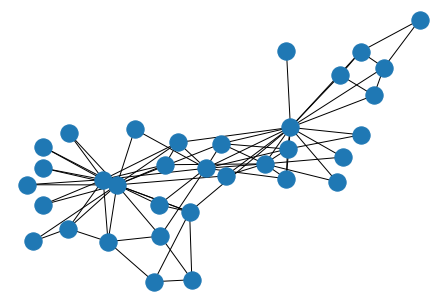

In [2]:
# Create a graph and visualize it
G = nx.karate_club_graph()

import matplotlib.pyplot as plt
nx.draw(G)

In [3]:
import gurobipy as gp
from gurobipy import GRB

In [4]:
# Each color class has a representative vertex.
# Assign every vertex to some other vertex (color class)

# Create model object
m = gp.Model()

# Create variable for each pair of nodes
x = m.addVars( G.nodes, G.nodes, vtype=GRB.BINARY )

# Objective: minimize number of representatives
m.setObjective( gp.quicksum( x[i,i] for i in G.nodes), GRB.MINIMIZE )

# Constraints: must assign each vertex i to some representative
m.addConstrs( gp.quicksum( x[i,j] for j in G.nodes ) == 1 for i in G.nodes )

# Constraints: asymmetric, cannot assign i->j when i<j
m.addConstrs( x[i,j] == 0 for i in G.nodes for j in G.nodes if i<j )

# Constraints: cannot assign i->j when {i,j} is an edge
m.addConstrs( x[i,j] == 0 for i,j in G.edges )
m.addConstrs( x[j,i] == 0 for i,j in G.edges )
               
# Constraints: cannot assign i->v and j->v when {i,j} is an edge
m.addConstrs( x[i,v] + x[j,v] <= x[v,v] for i,j in G.edges for v in G.nodes if v not in {i,j} )

# Constraints: cannot assign i->j when j is not a representative
m.addConstrs( x[i,j] <= x[j,j] for i in G.nodes for j in G.nodes )
               
# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 4403 rows, 1156 columns and 11605 nonzeros
Model fingerprint: 0xc2b8a20d
Variable types: 0 continuous, 1156 integer (1156 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 9.0000000
Presolve removed 4014 rows and 712 columns
Presolve time: 0.06s
Presolved: 389 rows, 444 columns, 1605 nonzeros
Variable types: 0 continuous, 444 integer (444 binary)

Root relaxation: objective 5.000000e+00, 174 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0 

In [5]:
# Find the associated coloring
representatives = [ i for i in G.nodes if x[i,i].x > 0.5 ]
coloring = [ -1 for i in G.nodes ]

for j in range(len(representatives)):
    r = representatives[j]
    for i in G.nodes:
        if x[i,r].x > 0.5:
            coloring[i] = j
        
print(coloring)

[0, 1, 2, 3, 1, 1, 4, 4, 1, 0, 3, 1, 1, 4, 3, 0, 0, 2, 1, 3, 0, 2, 3, 1, 2, 0, 4, 0, 0, 0, 3, 3, 4, 2]


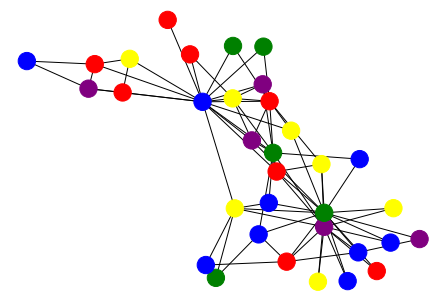

In [6]:
# Draw it
palette = ["blue", "red", "green", "yellow", "purple"]

node_colors = [ palette[coloring[i]] for i in G.nodes ]

nx.draw( G, node_color=node_colors )